In [74]:
from keras.datasets import mnist

In [75]:
# x는 이미지, y는 라벨
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [76]:
x_train.shape

(60000, 28, 28)

In [77]:
print(f'x_train.shape:{x_train.shape}')

x_train.shape:(60000, 28, 28)


In [78]:
print(f'x_test.shape:{x_test.shape}')

x_test.shape:(10000, 28, 28)


In [79]:
print(f'y_train.shape:{y_train.shape}')

y_train.shape:(60000,)


In [80]:
print(f'y_test.shape:{y_test.shape}')

y_test.shape:(10000,)


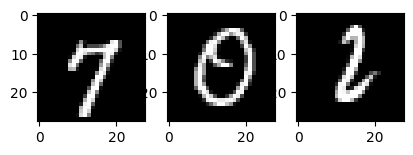

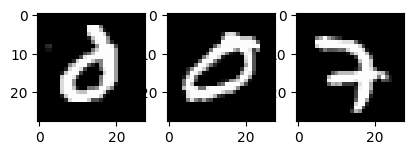

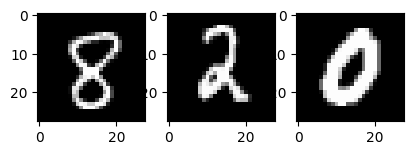

In [81]:
# 이 코드는 이미지만 보려고 한 것

import matplotlib.pyplot as plt
import random

for i in range(1, 4, 1):
    for j in range(1, 4, 1):
        plt.subplot(i, 4, j)
        plt.imshow(x_train[random.randint(0,60000)], cmap='gray')
    plt.show()

In [82]:
x_train_vec = x_train.reshape((60000, 28, 28, 1))
x_test_vec = x_test.reshape((10000, 28, 28, 1))


print(f'x_train.shape:{x_train.shape}')
print(f'x_test.shape:{x_test.shape}')

print(f'x_train_vec.shape:{x_train_vec.shape}')
print(f'x_test_vec.shape:{x_test_vec.shape}')

x_train.shape:(60000, 28, 28)
x_test.shape:(10000, 28, 28)
x_train_vec.shape:(60000, 28, 28, 1)
x_test_vec.shape:(10000, 28, 28, 1)


In [83]:
# One-hot Encoding
# 0 => [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# 1 => [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
import numpy as np

def to_one_hot(labels, dimension=10):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print(f"y_train_vec.shape:{y_train_vec.shape}")

y_train_vec.shape:(60000, 10)


In [95]:
print(y_train[1])
print(y_train_vec[1])

3
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [96]:
for x in x_train[0]:
    for i in x:
        print('{:3}'.format(i), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [85]:
rand_indices = np.random.permutation(60000)
train_indices = rand_indices[0:50000]
valid_indices = rand_indices[50000:60000]

x_valid_vec = x_train_vec[train_indices,:, :, :]
y_valid_vec = y_train_vec[train_indices,: ]

x_train_vec = x_train_vec[train_indices,:, :, :]
y_train_vec = y_train_vec[train_indices,: ]